# Temporalis demonstration notebook

This notebook demonstrates the use of the [Temporalis](http://temporalis.readthedocs.io/en/latest/) software. You should probably also know about the [Brightway2 LCA framework](http://brightwaylca.org/).

In [1]:
import bw2temporalis
print("Temporialis version:", bw2temporalis.__version__)
assert bw2temporalis.__version__ >= (1, 0), "Temporalis needs to be upgraded!"

Temporialis version: (1, 0, 'RC3')


In [2]:
from brightway2 import *
from bw2temporalis import *
import numpy as np

In [3]:
if "tempo_demo" not in list(projects):
    projects.create_project("tempo_demo")
projects.set_current("tempo_demo")

In [4]:
if "biosphere3" not in databases:
    create_default_biosphere3()

## Creating a temporal inventory database

In [5]:
METHANE = ('biosphere3', '0795345f-c7ae-410c-ad25-1845784c75f5')  # Methane, fossil, air, kg
CO2 = ('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e')      # CO2, fossil, air, kg

In [6]:
data = {
    ('example', 'Functional Unit'): {
        'exchanges': [
            {
                'amount': 5,
                'input': ('example', 'EOL'),
                'temporal distribution': [
                TemporalDistribution(np.array([ 0,  1,  2,  3,  4],dtype='timedelta64[Y]') ,np.array([1.0, 1.0, 1.0, 1.0, 1.0])),
                ],
                'type': 'technosphere'
            },
        ],
        'name': 'Functional Unit',
        'type': 'process'
    },
    ('example', 'EOL'): {
        'exchanges': [
            {
                'amount': 0.8,
                'input': ('example', 'Waste'),
                'type': 'technosphere'
            },
            {
                'amount': 0.2,
                'input': ('example', 'Landfill'),
                'type': 'technosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Use'),
                'type': 'technosphere'
            },
        ],
        'name': 'EOL',
        'type': 'process'
    },
    ('example', 'Use'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Production'),
                'temporal distribution': TemporalDistribution(np.array([4],dtype='timedelta64[M]') ,np.array([1.0])),
                'type': 'technosphere'
            },
        ],
        'name': 'Use',
        'type': 'process'
    },
    ('example', 'Production'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Transport'),
                'temporal distribution': TemporalDistribution(np.array([200],dtype='timedelta64[D]') ,np.array([1.0])),
                'type': 'technosphere'
            },
        ],
        'name': 'Production',
        'type': 'process'
    },
    ('example', 'Transport'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Sawmill'),
                'type': 'technosphere'
            },
            {
                'amount': 0.1,
                'input': CO2,
                'type': 'biosphere'
            },
        ],
        'name': 'Production',
        'type': 'process'
    },
    ('example', 'Sawmill'): {
        'exchanges': [
            {
                'amount': 1.2,
                'input': ('example', 'Forest'),
                'temporal distribution': TemporalDistribution(np.array([14],dtype='timedelta64[M]') ,np.array([1.2])),
                'type': 'technosphere'
            },
            {
                'amount': 0.1,
                'input': CO2,
                'type': 'biosphere'
            },
        ],
        'name': 'Sawmill',
        'type': 'process'
    },
    ('example', 'Forest'): {
        'exchanges': [
            {
                'amount': -.2 * 6,
                'input': CO2,
                'temporal distribution': TemporalDistribution(np.array([-4,-3,0,1,2,5],dtype='timedelta64[Y]') ,np.array([-.2]*6)),             
                'type': 'biosphere'
            },
            {
                'amount': 1.5,
                'input': ('example', 'Thinning'),
                'temporal distribution': TemporalDistribution(np.array([-3,0,1],dtype='timedelta64[Y]') ,np.array([.5]*3)),
                'type': 'technosphere'
            },
        ],
        'name': 'Forest',
        'type': 'process'
    },
    ('example', 'Thinning'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Thinning'),
                'type': 'production'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - thinnings'),
                'type': 'production'
            },
        ],
        'name': 'Thinning',
        'type': 'process'
    },
    ('example', 'Landfill'): {
        'exchanges': [
            {
                'amount': 0.1,
                'input': METHANE,
                'temporal distribution': TemporalDistribution(np.array([10,20,40,60],dtype='timedelta64[M]') ,np.array([0.025]*4)), 

                'type': 'biosphere'
            },
        ],
        'name': 'Landfill',
        'type': 'process'
    },
    ('example', 'Waste'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Waste'),
                'type': 'production'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - waste'),
                'type': 'production'
            },
        ],
        'name': 'Waste',
        'type': 'process'
    },
    ('example', 'Avoided impact - waste'): {
        'exchanges': [
            {
                'amount': -0.6,
                'input': CO2,
                'type': 'biosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - waste'),
                'type': 'production'
            },
        ],
        'name': 'Avoided impact - waste',
        'type': 'process'
    },
    ('example', 'Avoided impact - thinnings'): {
        'exchanges': [
            {
                'amount': -0.2,
                'input': CO2,
                'type': 'biosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - thinnings'),
                'type': 'production'
            },
        ],
        'name': 'Avoided impact - thinnings',
        'type': 'process'
    }
}

db = Database("example")
db.write(data)

Writing activities to SQLite3 database:
0% [############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 03/05/2018 08:15:25
  Finished: 03/05/2018 08:15:25
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.42


## Create static LCIA method

Note the units will be different from the dynamic method; this is watts/m2.

Values from 2013 assessment report.

In [7]:
if ('IPCC 2013 100',) not in methods:
    standard_ipcc = Method(('IPCC 2013 100',))
    standard_ipcc.register()
    standard_ipcc.write([
        [CO2, 1],
        [METHANE, 34]
    ])

## Create dynamic methods

Adapted from [co-fire library](https://github.com/gschivley/co-fire).

Units are degree Kelvin.

In [8]:
if "GTP OP base" not in dynamic_methods:
    create_climate_methods()

## Check static LCA scores

In [9]:
lca = LCA({('example', 'EOL'): 1}, ('IPCC 2013 100',))
lca.lci()
lca.lcia()
lca.score

0.27999995470046835

In [10]:
from bw2analyzer import ContributionAnalysis

ContributionAnalysis().annotated_top_processes(lca)

[(-1.4400001144409202, 1.2000000476837158, 'Forest' (None, None, None)),
 (0.6800000202655794, 0.20000000298023224, 'Landfill' (None, None, None)),
 (0.480000026226044,
  -0.800000011920929,
  'Avoided impact - waste' (None, None, None)),
 (0.360000019669533,
  -1.8000000715255737,
  'Avoided impact - thinnings' (None, None, None)),
 (0.10000000149011612, 1.0, 'Sawmill' (None, None, None)),
 (0.10000000149011612, 1.0, 'Production' (None, None, None)),
 (0.0, 0.800000011920929, 'Waste' (None, None, None)),
 (0.0, 1.8000000715255737, 'Thinning' (None, None, None)),
 (0.0, 1.0, 'Production' (None, None, None)),
 (0.0, 1.0, 'Use' (None, None, None)),
 (0.0, 1.0, 'EOL' (None, None, None)),
 (0.0, 0.0, 'Functional Unit' (None, None, None))]

In [11]:
ContributionAnalysis().annotated_top_emissions(lca)

[(0.6800000202655794,
  0.020000000596046452,
  'Methane, fossil' (kilogram, None, ('air',))),
 (-0.40000006556511103,
  -0.40000006556511103,
  'Carbon dioxide, fossil' (kilogram, None, ('air',)))]

## Dynamic LCA

In [12]:
%matplotlib inline

In [13]:
from matplotlib import pyplot as plt
import numpy as np

In [14]:
dlca = DynamicLCA({('example', 'EOL'): 1}, ("GTP OP base", "worst case"))
timeline = dlca.calculate()

In [15]:
characterized = timeline.characterize_dynamic("GTP OP base")

In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt

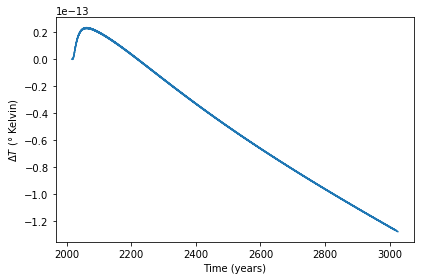

In [18]:
plt.plot(*characterized)
plt.xlabel("Time (years)")
plt.ylabel(r"$\Delta T$ (° Kelvin)")
plt.tight_layout()